# Scénario

Vous êtes data analyst d'une grande chaîne de librairie, fraîchement embauché depuis une semaine ! Vous avez fait connaissance avec vos collègues, votre nouveau bureau, mais surtout, la machine à café high-tech.
 
Mais revenons à votre mission : il est temps de mettre les mains dans le cambouis ! Le service Informatique vous a donné l’accès à la base de données des ventes. À vous de vous familiariser avec les données, et de les analyser. Votre manager souhaite que vous réalisiez une présentation pour vous "faire la main".
Comme vous l'avez appris dans vos recherches avant de postuler, votre entreprise, "Rester livres" s'est d'abord développée dans une grande ville de France, avec plusieurs magasins, jusqu'à décider d'ouvrir une boutique en ligne. Son approche de la vente de livres en ligne, basée sur des algorithmes de recommandation, lui a valu un franc succès !


# Les données

Vous avez accès à ces données, extraites directement de la base de l’entreprise vers les fichiers CSV. Voici les fichiers à votre disposition :
les ventes (appelées “Transactions”) ;
la liste des clients ;
la liste des produits.

[Téléchargez le jeu de données à cette adresse](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-analyst/dataset_P4.zip)

# Vos missions


## Mission n° 1 - Nettoyage des données

Avant de pouvoir entrer dans le vif du sujet, il vous faudra faire un peu de nettoyage ! Par exemple, vous devrez faire des choix quant au traitement des valeurs manquantes et des valeurs aberrantes.

In [1]:
from IPython.core.display import HTML
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
HTML( """
<style>

.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle}
    
</style>
""" )

In [3]:
customers = pd.read_csv('/Users/Gladou/Documents/OpenClassRooms/Parcours Data Analyst/Projets/P4/P4_00_dataset/customers.csv')
products = pd.read_csv('/Users/Gladou/Documents/OpenClassRooms/Parcours Data Analyst/Projets/P4/P4_00_dataset/products.csv')
transactions = pd.read_csv('/Users/Gladou/Documents/OpenClassRooms/Parcours Data Analyst/Projets/P4/P4_00_dataset/transactions.csv')

### Customers

In [4]:
# On vérifie que le fichier a été correctement importé

customers.head(2)

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975


In [5]:
# On prend connaissance de sa taille 

customers.shape

(8623, 3)

In [6]:
# On regarde s'il y a des NaN

customers.isna().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [7]:
# On vérifie s'il y a des duplicatas

customers.duplicated().sum()

0

In [8]:
# On prend connaissance des types des colonnes 

customers.dtypes

client_id    object
sex          object
birth         int64
dtype: object

In [9]:
# On prend connaissance des principales informations 

customers.describe(include='all')

,client_id,sex,birth
count,8623,8623,8623.000000
unique,8623,2,NaN
top,c_7450,f,NaN
freq,1,4491,NaN
mean,NaN,NaN,1978.280877
std,NaN,NaN,16.919535
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


In [10]:
# A priori, pas de valeurs incohérentes ici.

### Products

In [11]:
products.head(2)

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0


In [12]:
products.shape

(3287, 3)

In [13]:
products.isna().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [14]:
products.duplicated().sum()

0

In [15]:
products.dtypes

id_prod     object
price      float64
categ        int64
dtype: object

In [16]:
products.describe(include='all')

,id_prod,price,categ
count,3287,3287.000000,3287.000000
unique,3287,NaN,NaN
top,0_608,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.856641,0.370246
std,NaN,29.847908,0.615387
min,NaN,-1.000000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.060000,0.000000
75%,NaN,22.990000,1.000000


In [17]:
# On constate ici qu'un (ou plusieurs) produit à un prix égal -1, (valeur minimale). 
# Cela paraît étonnant qu'un prix soit négatif, il faut donc approfondir la réflexion. 

# On remarque qu'en moyenne, le prix des produits est de 21,86 €.

In [18]:
products[(products['price'] <= 0)]

,id_prod,price,categ
731,T_0,-1.0,0


In [19]:
# A priori, il n'y a qu'un seul produit répondant à la condition inférieur ou égal à 0. 

### Transactions

In [20]:
transactions.head(2)

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277


In [21]:
transactions.shape

(337016, 4)

In [22]:
transactions.isna().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [23]:
transactions.duplicated().sum()

126

In [24]:
# La ligne précédente nous renvoie 126 doublons, avant de les supprimer, on s'intérèsse plus en détail à 
# quoi ils correspondent.

transactions[transactions.duplicated()]

,id_prod,date,session_id,client_id
34387,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_0
54813,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
57261,T_0,test_2021-03-01 02:30:02.237439,s_0,ct_1
58802,T_0,test_2021-03-01 02:30:02.237429,s_0,ct_0
60170,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_0
...,...,...,...,...
332594,T_0,test_2021-03-01 02:30:02.237445,s_0,ct_0
332705,T_0,test_2021-03-01 02:30:02.237423,s_0,ct_1
332730,T_0,test_2021-03-01 02:30:02.237421,s_0,ct_1
333442,T_0,test_2021-03-01 02:30:02.237431,s_0,ct_1


In [25]:
# Ici on se rend compte que les doublons concernent des transactions tests. 

# Ainsi, on peut se permettre de les supprimer afin qu'il n'y ai pas de biais dans la suite de nos analyses.

transactions = transactions.drop_duplicates()

In [26]:
# Comme les doublons font références à des transactions tests, je décide de vérifier les lignes 
# correspondantes à ces dernières. 

transactions_tests = transactions[transactions['date'].str.contains('test')]
transactions_tests

,id_prod,date,session_id,client_id
1431,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1
2365,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_1
2895,T_0,test_2021-03-01 02:30:02.237414,s_0,ct_1
5955,T_0,test_2021-03-01 02:30:02.237441,s_0,ct_0
7283,T_0,test_2021-03-01 02:30:02.237434,s_0,ct_1
...,...,...,...,...
264317,T_0,test_2021-03-01 02:30:02.237416,s_0,ct_1
288918,T_0,test_2021-03-01 02:30:02.237415,s_0,ct_1
293107,T_0,test_2021-03-01 02:30:02.237421,s_0,ct_0
298399,T_0,test_2021-03-01 02:30:02.237423,s_0,ct_1


In [27]:
transactions_tests['client_id'].unique()

array(['ct_1', 'ct_0'], dtype=object)

In [28]:
# On constate ici deux choses : 

# Lors de notre nettoyage préalable sur le fichier products, il y avait donc un produit avec un prix 
# négatif, dont l'id_prod était T_0. Dans le fichier transactions, les tests ont pour id_prod T_0. Ainsi, on
# peut supprimer la ligne correspondante dans le fichier products. 

products = products[~(products['id_prod'] == 'T_0')]

# De plus, la cellule précédente indique que les transactions tests ont pour client_id ct_1 et ct_0. On 
# regarde donc s'ils apparaissent dans le fichier customers.

customers[(customers['client_id'] == 'ct_1') | (customers['client_id'] == 'ct_0')]  

,client_id,sex,birth
2735,ct_0,f,2001
8494,ct_1,m,2001


In [29]:
customers = (customers[~(customers['client_id'] == 'ct_1') ^
                        (customers['client_id'] == 'ct_0')]).reset_index(drop=True)

In [30]:
# On supprime également les transactions tests

transactions = transactions[~transactions['date'].str.contains('test')].reset_index(drop=True)

In [31]:
transactions.dtypes

id_prod       object
date          object
session_id    object
client_id     object
dtype: object

In [32]:
# La colonne date est de type object. Il est préférable de formater cette colonne en type datetime

transactions['date'] = transactions['date'].astype('datetime64[s]')
transactions

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28,s_18746,c_4450
1,2_226,2022-02-03 01:55:53,s_159142,c_277
2,1_374,2021-09-23 15:13:46,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25,s_63642,c_1242
...,...,...,...,...
336811,1_671,2021-05-28 12:35:46,s_40720,c_3454
336812,0_759,2021-06-19 00:19:23,s_50568,c_6268
336813,0_1256,2021-03-16 17:31:59,s_7219,c_4137
336814,2_227,2021-10-30 16:50:15,s_112349,c_5


### Jointure des 3 dataframes précédents 

In [33]:
join = pd.merge(transactions, products, on='id_prod', how='left')
join

,id_prod,date,session_id,client_id,price,categ
0,0_1483,2021-04-10 18:37:28,s_18746,c_4450,4.99,0.0
1,2_226,2022-02-03 01:55:53,s_159142,c_277,65.75,2.0
2,1_374,2021-09-23 15:13:46,s_94290,c_4270,10.71,1.0
3,0_2186,2021-10-17 03:27:18,s_105936,c_4597,4.20,0.0
4,0_1351,2021-07-17 20:34:25,s_63642,c_1242,8.99,0.0
...,...,...,...,...,...,...
336811,1_671,2021-05-28 12:35:46,s_40720,c_3454,31.99,1.0
336812,0_759,2021-06-19 00:19:23,s_50568,c_6268,22.99,0.0
336813,0_1256,2021-03-16 17:31:59,s_7219,c_4137,11.03,0.0
336814,2_227,2021-10-30 16:50:15,s_112349,c_5,50.99,2.0


In [34]:
join = pd.merge(join, customers, on='client_id', how='left')
join

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1483,2021-04-10 18:37:28,s_18746,c_4450,4.99,0.0,f,1977
1,2_226,2022-02-03 01:55:53,s_159142,c_277,65.75,2.0,f,2000
2,1_374,2021-09-23 15:13:46,s_94290,c_4270,10.71,1.0,f,1979
3,0_2186,2021-10-17 03:27:18,s_105936,c_4597,4.20,0.0,m,1963
4,0_1351,2021-07-17 20:34:25,s_63642,c_1242,8.99,0.0,f,1980
...,...,...,...,...,...,...,...,...
336811,1_671,2021-05-28 12:35:46,s_40720,c_3454,31.99,1.0,m,1969
336812,0_759,2021-06-19 00:19:23,s_50568,c_6268,22.99,0.0,m,1991
336813,0_1256,2021-03-16 17:31:59,s_7219,c_4137,11.03,0.0,f,1968
336814,2_227,2021-10-30 16:50:15,s_112349,c_5,50.99,2.0,f,1994


In [35]:
join.isna().sum()

id_prod         0
date            0
session_id      0
client_id       0
price         103
categ         103
sex             0
birth           0
dtype: int64

In [36]:
# On regarde à quoi correspondent ces 103 lignes ou NaN est renvoyé 

nan = join[(join['price'].isnull() == True) | (join['categ'].isnull() == True)]
nan

,id_prod,date,session_id,client_id,price,categ,sex,birth
6231,0_2245,2021-06-17 03:03:12,s_49705,c_1533,NaN,NaN,m,1972
10797,0_2245,2021-06-16 05:53:01,s_49323,c_7954,NaN,NaN,m,1973
14045,0_2245,2021-11-24 17:35:59,s_124474,c_5120,NaN,NaN,f,1975
17480,0_2245,2022-02-28 18:08:49,s_172304,c_4964,NaN,NaN,f,1982
21071,0_2245,2021-03-01 00:09:29,s_3,c_580,NaN,NaN,m,1988
...,...,...,...,...,...,...,...,...
322523,0_2245,2021-04-06 19:59:19,s_16936,c_4167,NaN,NaN,f,1979
329226,0_2245,2021-03-30 23:29:02,s_13738,c_7790,NaN,NaN,f,1983
330297,0_2245,2021-12-03 14:14:40,s_128815,c_6189,NaN,NaN,f,1984
335331,0_2245,2021-04-27 18:58:47,s_26624,c_1595,NaN,NaN,f,1973


In [37]:
nan['id_prod'].unique()

array(['0_2245'], dtype=object)

In [38]:
# Les 103 lignes où il manque le prix et la catégorie concernent un seul produit, ayant pour id_prod 
# 0_2245. 

# En observant de plus près le DF join, on émet l'hypothèse que le premier chiffre de l'id_prod correspond 
# à la catégorie à laquelle il appartient.

# On teste donc cette hypothèse : on regarde si la première chaine de caractère de l'id_prod correspond à 
# la première chaine de caractère de la colonne categ.   

test = join[['id_prod', 'categ']].copy()
test['result'] = test['id_prod'].str[0] == test['categ'].astype(str).str[0]

# On vérifie ensuite là où la valeur False est renvoyée : 

test = test[test['result'] == False]
test

,id_prod,categ,result
6231,0_2245,NaN,False
10797,0_2245,NaN,False
14045,0_2245,NaN,False
17480,0_2245,NaN,False
21071,0_2245,NaN,False
...,...,...,...
322523,0_2245,NaN,False
329226,0_2245,NaN,False
330297,0_2245,NaN,False
335331,0_2245,NaN,False


In [39]:
# On peut ainsi constater qu'il y a 103 lignes où la valeur False est renvoyée (comme notre DF nan
# précédent). 

test['id_prod'].unique()

array(['0_2245'], dtype=object)

In [40]:
# Ainsi, là où la valeur False est retournée concerne uniquement l'id_prod 0_2245.

# On peut donc remplacer les nan de la categ du produit 0_2245 par 0. 

join['categ'].replace(np.nan, 0, inplace=True)

# Pour plus de lisibilité 
join['categ'] = join['categ'].astype(int)
join['birth'] = join['birth'].astype(int)

var_modif = ['id_prod', 'session_id', 'client_id', 'categ', 'sex']
for var in var_modif : 
    join[var] = join[var].astype('category')

La moyenne des prix de la catégorie 0 est de  10.65 €.

La médiane des prix de la catégorie 0 est de  9.99 €.




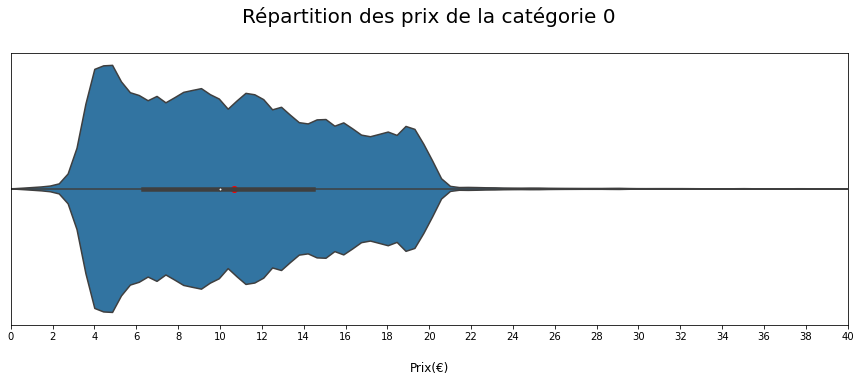

In [41]:
# Concernant le prix du produit 0_2245, on choisit ici de faire une imputation par la moyenne des prix des
# produits de la catégorie 0. 

# "Il est nécessaire de toujours préciser quelle méthode est utilisée dans chacun des résultats d'analyse 
# présentés. C'est une question d'honnêteté intellectuelle."

# " Deviner (imputer) des valeurs modifie l'échantillon, car les valeurs imputées sont fausses. En 
# particulier, les calculs de variances ou de corrélations seront faussées. Il faut donc les utiliser avec 
# précaution. 

# " Une bonne pratique peut être d'observer la distribution de la variable (ou tout au moins ses quantiles) 
# avant et après l'imputation, pour voir si sa forme n'a pas trop été impactée. "

imputation = join[join['categ'] == 0]


# Distribution de la variable avant imputation : 

mean = round(imputation['price'].mean(),2)
median = round(imputation['price'].median(),2)

print("La moyenne des prix de la catégorie 0 est de ", mean, "€.")
print("")
print("La médiane des prix de la catégorie 0 est de ", median, "€.")
print("")
print("")

plt.figure(figsize=(15,5))


sns.violinplot(data=imputation["price"], orient='h', inner="box", showmean=True)
plt.scatter(x=mean, y=0, color="red")
plt.xlim([0,40])
plt.xlabel(xlabel='Prix(€)', fontsize=12, labelpad=20)
plt.xticks(range(0,41,2))
plt.yticks([])
plt.title("Répartition des prix de la catégorie 0", fontsize=20, pad=30)

plt.show()

In [42]:
# Le prix moyen de la catégorie 0 est donc de 10,65 €

# Etant donné que la moyenne (sensible aux outliers) est proche de la médiane, on peut en conclure qu'il y 
# a peu d'outliers et donc se permettre de réaliser une imputation par la moyenne. Ici, on a pris le soin de
# vérifier la distribution de la variable après imputation. Pour une question de lisibilité cette 
# vérification n'est pas affichée (il n'y a aucune modification de la distribution). 

In [43]:
join['price'].replace(np.nan, 10.65, inplace=True)

### Exportation

In [44]:
join['année_mois'] = join['date'].dt.strftime('%Y-%m')

join['date'] = join['date'].dt.strftime('%Y-%m-%d')

join = join.sort_values('date').reset_index(drop=True)

# join['jour'] = join['date'].dt.day
# join['mois'] = join['date'].dt.month
# join['année'] = join['date'].dt.year

In [45]:
join.to_csv('join.csv', index=False)

In [46]:
# Please, go to P4_02_scriptanalyse